In [452]:
import math
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## **Искомая зависимость y = 2 * x + 5**

In [453]:
def point ():
    x = np.random.uniform(-2.5, 2)
    y = 2 * x + 5
    return x, y

In [454]:
def sizes ():
    n = 50
    m = 2
    return n, m

In [455]:
n, m = sizes()

In [456]:
def computeGradient (X, y, alpha, w):
    grad = alpha * 2 * np.dot(X.transpose(), (np.dot(X, w) - y)) / n
    return grad

def computeRegularization (beta, w):
    return 2 * beta * w / n

def setWeights (w, grad, reg):
    return w - grad - reg

def refillData (n, m, a, b):
    alpha = a
    beta = b
    w = []
    for i in range(m):
      w.append([0])

    feature = []
    target = []
    for i in range(n):
      x, y = point()
      feature.append([1, x])
      target.append([y + np.random.uniform(-0.5, 0.5)])
    X = np.array(feature)
    y = np.array(target)
    w = np.array(w)
    return X, y, w, alpha, beta

def showGraph (graphDataX, graphDataY, name):
  sns.set_style("ticks")
  sns.scatterplot(x = graphDataX, y = graphDataY, color = 'blue')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(name)
  plt.show(sns)

# **Gradient Descent with Regularization**

In [457]:
X, y, w, alpha, beta = refillData(50, 2, 0.1, 0.00001)
graphDataX = []
graphDataY = []

for i in range (50):
    grad = computeGradient(X, y, alpha, w)
    reg = computeRegularization(beta, w)
    w = setWeights(w, grad, reg)
    graphDataX.append(w[0][0])
    graphDataY.append(w[1][0])
w

array([[4.89825557],
       [2.0281672 ]])

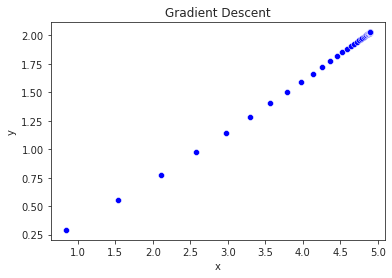

In [458]:
showGraph(graphDataX, graphDataY, name = 'Gradient Descent')

# **Stochastic Gradient Descent with Regularization**

In [459]:
X, y, w, alpha, beta = refillData(1500, 2, 0.1, 0.0001)
graphDataX = []
graphDataY = []

for i in range (0, 1500, 5):
    X_mbatch = X[i: i + 5]
    y_mbatch = y[i: i + 5]
    grad = computeGradient(X_mbatch, y_mbatch, alpha, w)
    reg = computeRegularization(beta, w)
    w = setWeights(w, grad, reg)

    graphDataX.append(w[0][0])
    graphDataY.append(w[1][0])
w

array([[4.99601142],
       [1.98438283]])

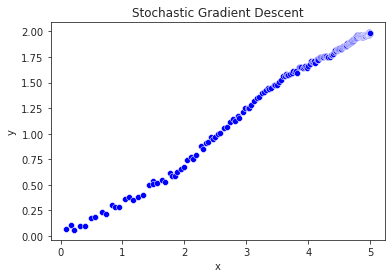

In [460]:
showGraph(graphDataX, graphDataY, name = 'Stochastic Gradient Descent')